In [142]:
!pip install imutils

In [143]:
!pip install easyocr

In [144]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import imutils
import easyocr

In [145]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


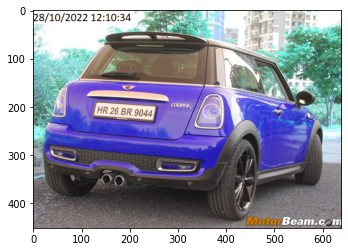

In [148]:
img = cv2.imread(r'C:\Users\sanjay upadhyaya\Desktop\jupyter\Input images\data\image8.jpg')
plt.imshow(img)

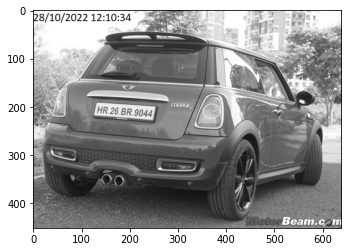

In [149]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

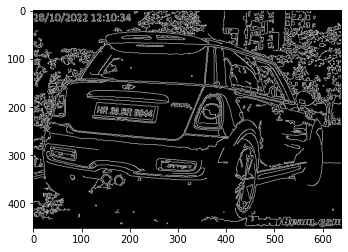

In [150]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [151]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [152]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [153]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

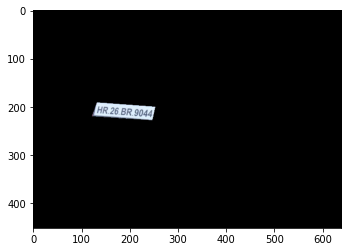

In [154]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [155]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

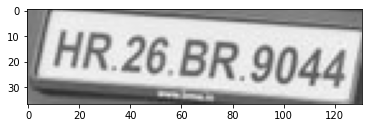

In [156]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [157]:
num_plate = easyocr.Reader(['en'])
result = num_plate.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5551307407105774)]

In [158]:
print(str)
dit = {"Number Plate ":result[0][1]}
dit

<class 'str'>


{'Number Plate ': 'HR.26 BR.9044'}

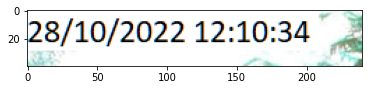

In [159]:
crop = img[0:40, 0:240]
plt.imshow(crop)

In [160]:
date_time = easyocr.Reader(['en'])
ans = date_time.readtext(crop)
ans

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 2], [206, 2], [206, 29], [0, 29]],
  '28/10/2022 12:10.34',
  0.5184469147062523)]

In [161]:
dit = {"Number Plate ":result[0][1],"Date & Time":ans[0][1]}
dit

{'Number Plate ': 'HR.26 BR.9044', 'Date & Time': '28/10/2022 12:10.34'}

In [162]:
df = pd.DataFrame(dit,index=[1])
df

,Number Plate,Date & Time
1,HR.26 BR.9044,28/10/2022 12:10.34


In [163]:
with open('License_plate.csv', 'a') as f:
    df.to_csv(f, header=False, index=True)

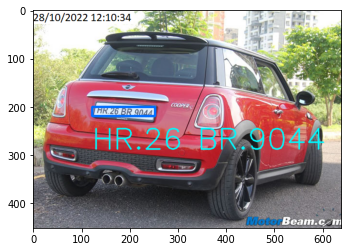

In [164]:
text = result[0][-2]                                                            
font = cv2.FONT_HERSHEY_SIMPLEX                                                 
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=2, color=(255,250,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (255,110,1),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))